# face API sample 
face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.
관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다

In [1]:
import requests 
from io import BytesIO 
from PIL import Image, ImageDraw, ImageFont
#Image=이미지오픈명령 ImageDraw=이미지에 그리는 명령어, ImageFont=이미지에 글쓰기

Subscription Key와 서비스의 주소를 설정합니다.

In [2]:
subscription_key ='cfed609ad3ef4031bb274bb3e808e302'

In [3]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [4]:
image_url='https://cdn.entermedia.co.kr/news/photo/202005/10914_27367_543.jpg'

In [5]:
img=Image.open(BytesIO(requests.get(image_url).content))

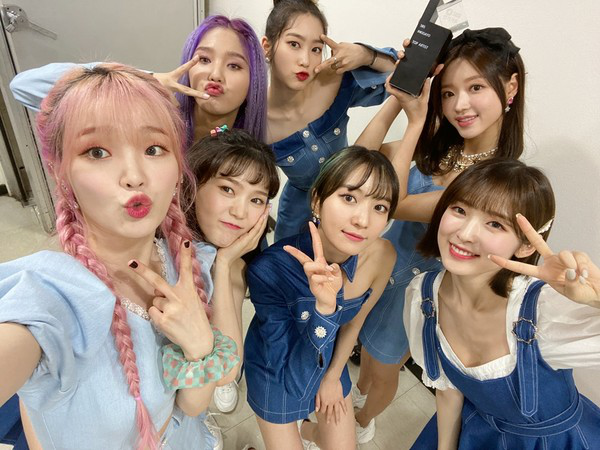

In [6]:
img

인식 api작성완료 
이제 헤드 작성

In [7]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
    'returnFaceID': 'true',
    'returnFaceAttributes': 'age,gender,emotion'
}

파라메타내용= 인식데이터(얼굴)에서 분석요청할 내용 <p>
        'returnFaceID': 각 얼굴의 고유값<p>
    'returnFaceAttributes'얼굴에서 받아올 속성들: 'age,gender,emotion'<p>
참고링크= https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/concepts/face-detection

In [8]:
data={'url':image_url}#데이터는 위에 만들어둔 IMG URL로 지정한다

서비스를 호출해서 결과를 확인함.

In [9]:
response = requests.post(faceDetection_url,
                        headers=headers,
                        params=params,
                        json=data)

(faceDetection_url,= 호출하는 주소지정
                        headers=세팅해둔 헤더
                        params=셋팅해둔 파마메터
                        json=data 실제로 사용할 이미지=데이터)

In [10]:
faces=response.json()

변수생성faces=<P>
response.json() = json()의 값으로 응답을 받아냄

In [11]:
faces #결과

[{'faceId': '3eee3791-dada-4a79-9580-bae46da5d07a',
  'faceRectangle': {'top': 117, 'left': 67, 'width': 125, 'height': 125},
  'faceAttributes': {'gender': 'female',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.146,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.605,
    'sadness': 0.001,
    'surprise': 0.247}}},
 {'faceId': '316d4132-2c04-4393-ba80-6ff677af9bb8',
  'faceRectangle': {'top': 193, 'left': 430, 'width': 79, 'height': 79},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': '74a34b92-f25b-4103-a6c9-3585eac55dcd',
  'faceRectangle': {'top': 182, 'left': 324, 'width': 72, 'height': 72},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.017,
    'disgust': 0.0,
    'fear': 0.0,
    'happi

속성 분석
    페이스아이디= 개체당 하나씩 붙음. 고유값을 난수로 표현<p>
    페이스렉텡글<p>
    페이스 어트리뷰트- 성별, 나이

In [12]:
#위의 분석값을 이미지에 그림
#draw=이미지를 수정할 수 있는 명령어
draw=ImageDraw.Draw(img)

In [13]:
# #반복문 for 이용하여 face라는 명령문에 faces 결과값들을 하나씩 대입하여  반복작업 
for face in faces: 
    
    rect = face['faceRectangle']#사각그리기 생성= 분석결과에서 위치 요소들(좌우위폭높이)를 반영하라고 명령    
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left+width,top+height)), outline='red')
    
     #변수ace_info 생성    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']#해피니스는 이모션에 귀속된 값이므로 점층적으로 써야함
    happiness = emotion['happiness']
    gender = face_info['gender']
    age= face_info['age']
    result = 'Gender:'+ gender +str(age)+'happiness:' + str(happiness*100)
    
    draw.text((left, top), result, fill='red')
  # 오류원인 오탈자 faces, emotion 추가안했었음
# 렉텡글+ 글자 는 출력되는대로 계속 남아 겹쳐진 채로 있으므로  겹쳐진 것 없애려면 이미지를 여는곳부터 다시 실행해야함

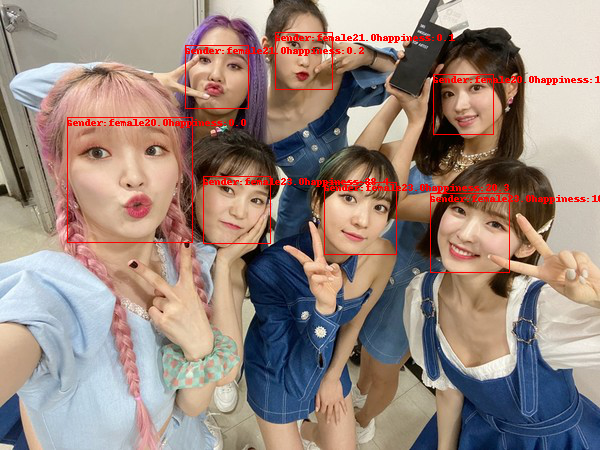

In [14]:
img